In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading file
df = pd.read_csv('/content/drive/MyDrive/DataSets/spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.shape

(5572, 5)

# Data Preprocessing

In [ ]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [ ]:
# Keeped useful names
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

In [ ]:
df.isnull().sum()

,0
label,0
message,0


In [ ]:
df.duplicated().sum()

np.int64(403)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Applying label encoding
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df["label"]= encoder.fit_transform(df["label"])

# Exploratory Data Analysis (EDA)

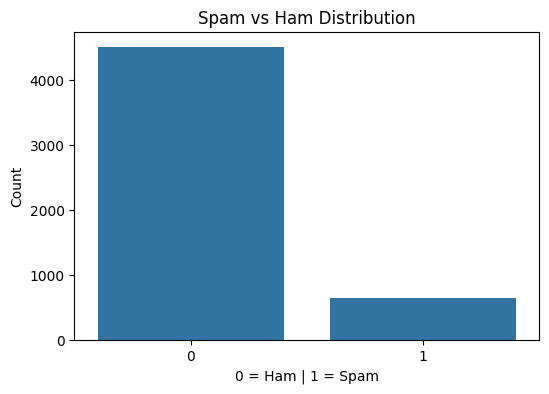

In [ ]:
# Distribution of Spam vs Ham
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Distribution")
plt.xlabel("0 = Ham | 1 = Spam")
plt.ylabel("Count")
plt.show()

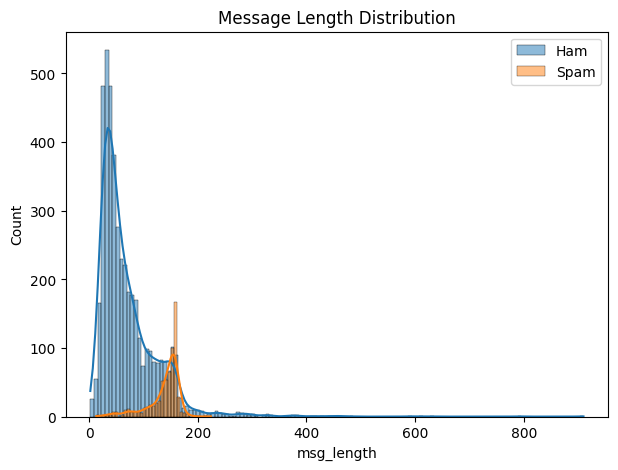

In [ ]:
# Visualizing Message Length Analysis
df['msg_length'] = df['message'].apply(len)

plt.figure(figsize=(7,5))
sns.histplot(df[df['label']==0]['msg_length'], label='Ham', kde=True)
sns.histplot(df[df['label']==1]['msg_length'], label='Spam', kde=True)
plt.legend()
plt.title("Message Length Distribution")
plt.show()

# Feature Engineering

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Cleaning the text
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = word_tokenize(text)
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

In [ ]:
df['cleaned_text'] = df['message'].apply(clean_text)
df.head()

,label,message,msg_length,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,49,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah dont think goes usf lives around though


In [ ]:
# Extracting Features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)

X = tfidf.fit_transform(df['cleaned_text'])
y = df['label']

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Modeling

In [ ]:
# Training Model
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
pred = model.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
# Performance Metrics
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)
print(classification_report(y_test, pred))

Accuracy : 0.9675174013921114
Precision: 0.98
Recall   : 0.7903225806451613
F1 Score : 0.875
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1107
           1       0.98      0.79      0.88       186

    accuracy                           0.97      1293
   macro avg       0.97      0.89      0.93      1293
weighted avg       0.97      0.97      0.97      1293



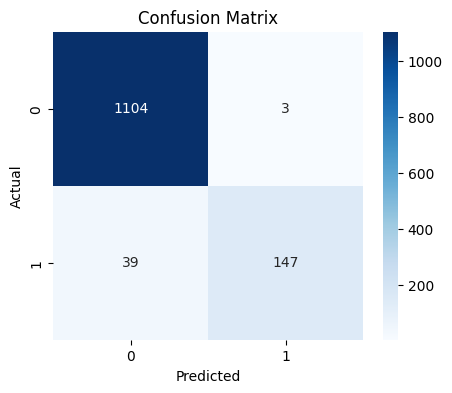

In [ ]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Feature importance according to words
feature_importance = model.feature_importances_

important_words = pd.DataFrame({
    'word': tfidf.get_feature_names_out(),
    'importance': feature_importance
}).sort_values(by='importance', ascending=False).head(15)

important_words

,word,importance
2769,txt,0.030325
969,free,0.028463
1608,mobile,0.027379
425,claim,0.027241
1996,prize,0.021200
2294,service,0.018988
2503,stop,0.018294
2801,urgent,0.018098
2141,reply,0.015952
2906,win,0.014714


In [ ]:
# Using on new sample email
sample_email = ["Congratulations! You won a free lottery. Click now"]

sample_clean = [clean_text(sample_email[0])]
sample_vec = tfidf.transform(sample_clean)

prediction = model.predict(sample_vec)

if prediction[0] == 1:
    print("Spam Email 🚫")
else:
    print("Not Spam ✅")

Not Spam ✅
